In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
%load_ext autoreload
%autoreload 2

import pysax
import pysequitur
import pyoutlier
import numpy as np 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## test pyoutlierdetection

In [10]:
detector = pyoutlier.TSOutlierDetection(sax_params = dict(window = 100, stride = 10, nbins = 4, alphabet = "ABCD"), 
                                        sequitur_params = dict(sequitur_path="sequitur/sequitur"))
xs = np.random.randn(1000000)

In [11]:
%time symbols = detector.sax_symbolize(xs)
%time reduced_symbols, reduced_symbol_indices = detector.numerosity_reduce(symbols)
print len(symbols), len(reduced_symbols), len(reduced_symbol_indices)
%time word_occurrences = detector.grammar_induce(reduced_symbols)
%time outliers = detector.mine_infrequent_segments(word_occurrences, threshold=5)

save temp file at /tmp/tmpbsCtjU
CPU times: user 2.26 s, sys: 222 ms, total: 2.48 s
Wall time: 4.55 s
CPU times: user 96.1 ms, sys: 1.24 ms, total: 97.3 ms
Wall time: 97.4 ms
99991 78143 78143
CPU times: user 95.8 ms, sys: 7.28 ms, total: 103 ms
Wall time: 336 ms
CPU times: user 5.61 ms, sys: 21 µs, total: 5.63 ms
Wall time: 5.64 ms


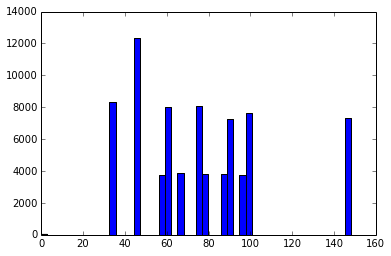

In [12]:
_ = plt.hist(word_occurrences, bins = 50)

In [13]:
[ (i, symbols[i], wc) for i,wc in zip(np.array(reduced_symbol_indices)[outliers], 
                                      np.asarray(word_occurrences)[outliers])]

[(slice(2103, 2104, None), ['DBBB'], 0),
 (slice(13319, 13320, None), ['BBBD'], 1),
 (slice(13324, 13325, None), ['BDBB'], 1),
 (slice(14588, 14589, None), ['CCAC'], 0),
 (slice(22318, 22319, None), ['BBBD'], 1),
 (slice(22321, 22322, None), ['BBDB'], 0),
 (slice(24591, 24592, None), ['CCCA'], 0),
 (slice(26579, 26580, None), ['DCBB'], 0),
 (slice(31412, 31413, None), ['BBDB'], 0),
 (slice(35884, 35885, None), ['BBBD'], 1),
 (slice(35892, 35893, None), ['CCAC'], 0),
 (slice(40626, 40627, None), ['CCCA'], 0),
 (slice(44036, 44037, None), ['BBDB'], 0),
 (slice(53295, 53296, None), ['CCAC'], 0),
 (slice(65128, 65129, None), ['ACCC'], 0),
 (slice(65848, 65849, None), ['CCAC'], 0),
 (slice(65954, 65955, None), ['BDBB'], 1),
 (slice(68469, 68470, None), ['BBBD'], 1),
 (slice(72204, 72205, None), ['CACC'], 0),
 (slice(75293, 75294, None), ['CCCA'], 0),
 (slice(76503, 76505, None), ['BBBD', 'BBBD'], 1),
 (slice(80128, 80129, None), ['CCCA'], 0),
 (slice(84028, 84029, None), ['BBDB'], 0),
 (sli

## usage

In [14]:
## window length should be long enough to cover possible outliers (otherwise outliers will be repeated and become
## patterns). stride should be small to reduce lag of detection.

detector = pyoutlier.TSOutlierDetection(sax_params = dict(window = 200, stride = 20, nbins = 4, alphabet = "ABCD"), 
                                        sequitur_params = dict(sequitur_path="sequitur/sequitur"))
ts = np.random.randn(6000)
ts[1000:1200] = 0
ts[5000:5560] = -1
ts[3000:3100] = np.sin(np.arange(3000, 3100) * 0.25) * 1.2

detector.fit(ts)

save temp file at /tmp/tmpduvWUe


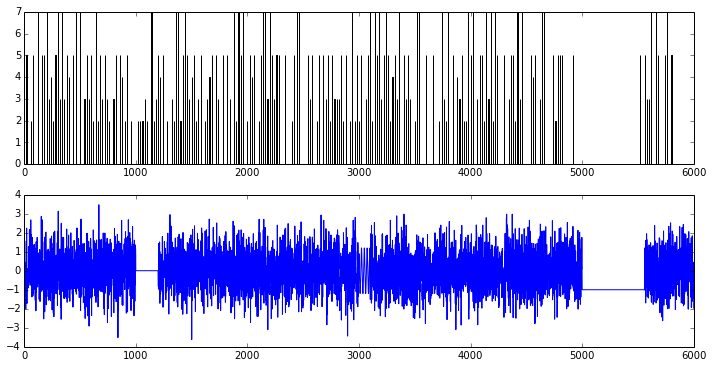

In [15]:
ts_density = detector.timeseries_density()
fig, axes = plt.subplots(2, 1, figsize = (12, 6))
axes[0].bar(*ts_density)
axes[1].plot(range(len(ts)), ts)

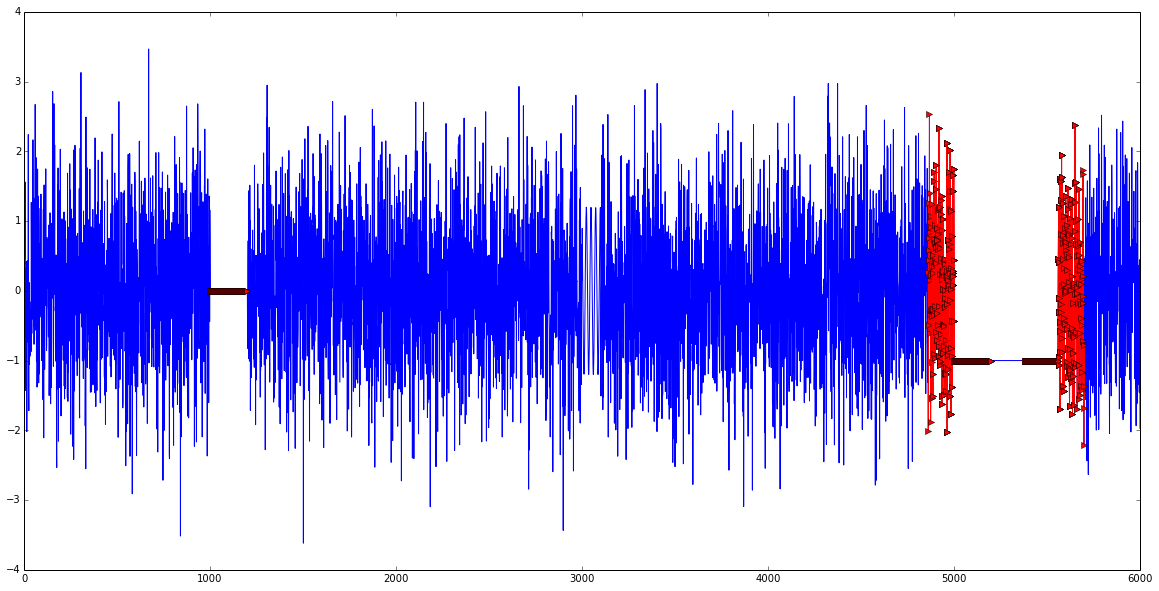

In [16]:
outliers, occurrences = detector.detect_outliers(occurrence_thr=0)
plt.figure(figsize = (20, 10))
plt.plot(range(len(ts)), ts)
for outlier in outliers:
    plt.plot(range(outlier.start, outlier.stop), ts[outlier], "r->")
    
#plt.xlim((4500, 6000))
#plt.xlim((500, 1500))